In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

# Regression Task:
the task is to make a regression model that could inform whether the car you wanted to buy was good value in relation to the market in general.
The data is UK Used Car Data 

In [2]:
cars_df = pd.read_csv('./audi.csv')

In [3]:
cars_df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [5]:
cars_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [6]:
cars_df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# Visualization of the data


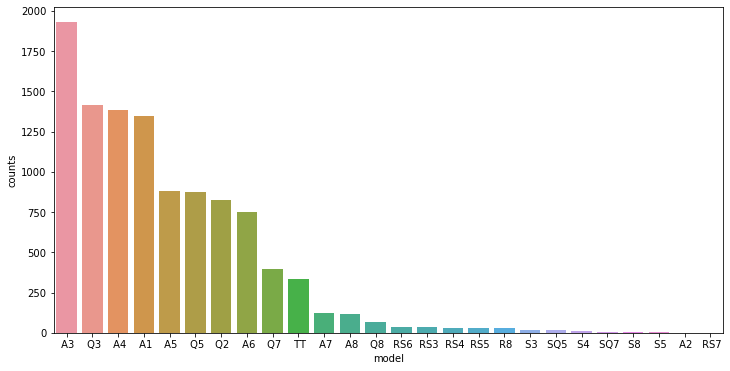

In [7]:
fig, ax = plt.subplots()

fig.set_size_inches(12, 6)

amount_per_model=cars_df["model"].value_counts().rename_axis('model').reset_index(name='counts')

sns.barplot(x="model", y="counts",data=amount_per_model)




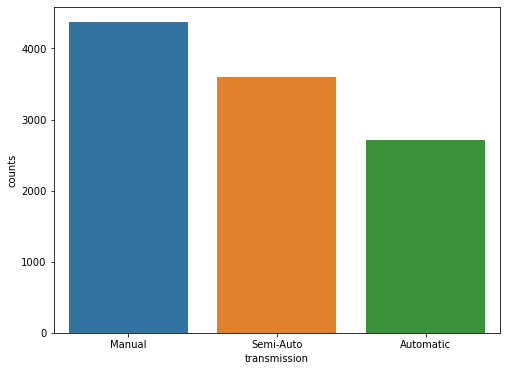

In [8]:
fig, ax = plt.subplots()

fig.set_size_inches(8, 6)

amount_per_transmission=cars_df["transmission"].value_counts().rename_axis('transmission').reset_index(name='counts')

sns.barplot(x="transmission", y="counts",data=amount_per_transmission)

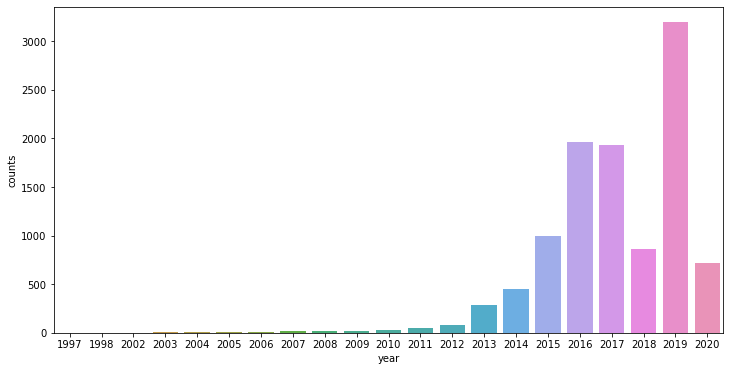

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
amount_per_year=cars_df["year"].value_counts().rename_axis('year').reset_index(name='counts')
sns.barplot(x="year", y="counts",data=amount_per_year)

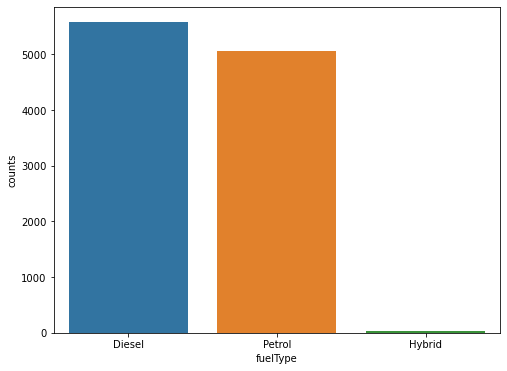

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
amount_per_fuel_type=cars_df["fuelType"].value_counts().rename_axis('fuelType').reset_index(name='counts')
sns.barplot(x="fuelType", y="counts",data=amount_per_fuel_type)

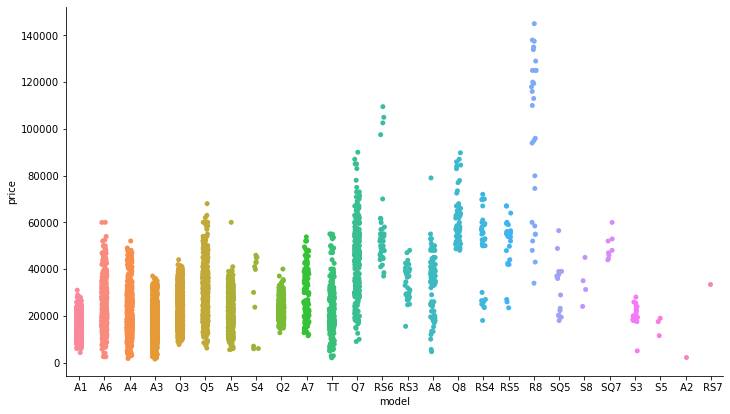

In [11]:
cars_cat_plot = sns.catplot(x="model", y="price" ,data=cars_df)
cars_cat_plot.fig.set_figwidth(12)
cars_cat_plot.fig.set_figheight(6)


In [12]:
cars_df.loc[cars_df["price"]<40000].size

cars_df.loc[cars_df["price"]<40000].size/cars_df.size

0.9310086239220098

In [13]:
cars_df[["model","price"]].groupby("model").mean().reset_index().sort_values('price', ascending=False)

,model,price
13,R8,97652.214286
12,Q8,60115.014493
17,RS6,55963.871795
16,RS5,51265.206897
15,RS4,50151.612903
24,SQ7,49269.000000
11,Q7,44788.319899
7,A8,34981.847458
14,RS3,34050.515152
22,S8,33807.750000


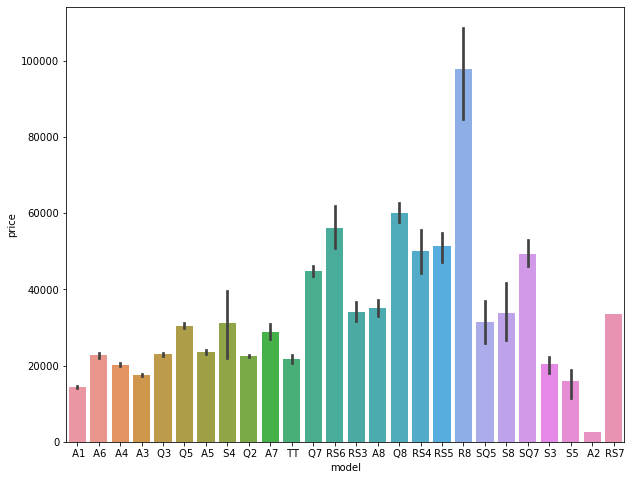

In [14]:
fig = plt.gcf()
fig.set_size_inches(10, 8)

sns.barplot(x="model", y="price", data=cars_df)
plt.show()


average price per model - we can see that the R8 is much more expensive than the other models

0.9069178852643419


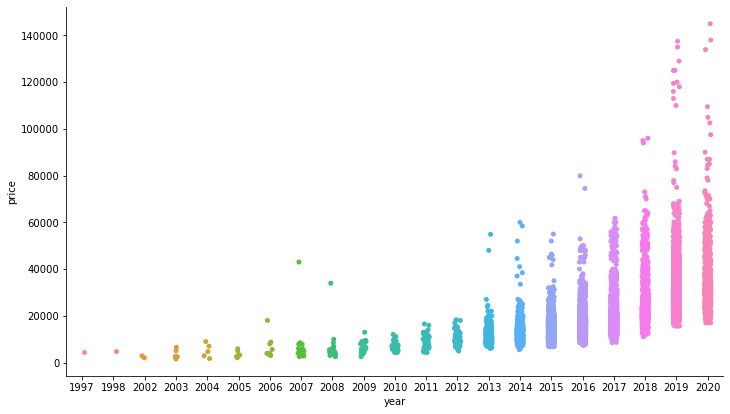

In [15]:
cars_cat_plot_price_year = sns.catplot(x="year", y="price" ,data=cars_df)
cars_cat_plot_price_year.fig.set_figwidth(12)
cars_cat_plot_price_year.fig.set_figheight(6)

print(cars_df.loc[cars_df["year"]>2014].size/cars_df.size)

most of the cars sold are from the year 2014 onwards -  we can interpret that from the density of the graph.


I have decided to create a new column that contains that age of the car compared to 2021

In [16]:
cars_df["age_of_car"] = 2021 - cars_df["year"]
cars_df = cars_df.drop(columns = ["year"])
cars_df.sample(10)

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age_of_car
2623,A6,43695,Automatic,1500,Diesel,145,36.2,3.0,2
1311,A4,8498,Manual,78268,Diesel,30,61.4,2.0,8
2939,A3,23995,Semi-Auto,15425,Petrol,145,42.2,1.5,2
5033,A6,24990,Semi-Auto,34300,Diesel,145,54.3,2.0,4
2521,A4,18995,Manual,14912,Petrol,145,51.4,1.4,3
6819,A3,22990,Semi-Auto,7470,Petrol,145,40.4,2.0,2
9000,Q3,18900,Manual,29777,Diesel,160,49.6,2.0,5
7095,A6,19950,Semi-Auto,42165,Diesel,30,61.4,3.0,5
10073,Q3,14750,Manual,46750,Petrol,145,49.6,1.4,5
10262,A6,14800,Manual,83023,Diesel,125,58.9,2.0,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c6193d0>,
      dtype=object)

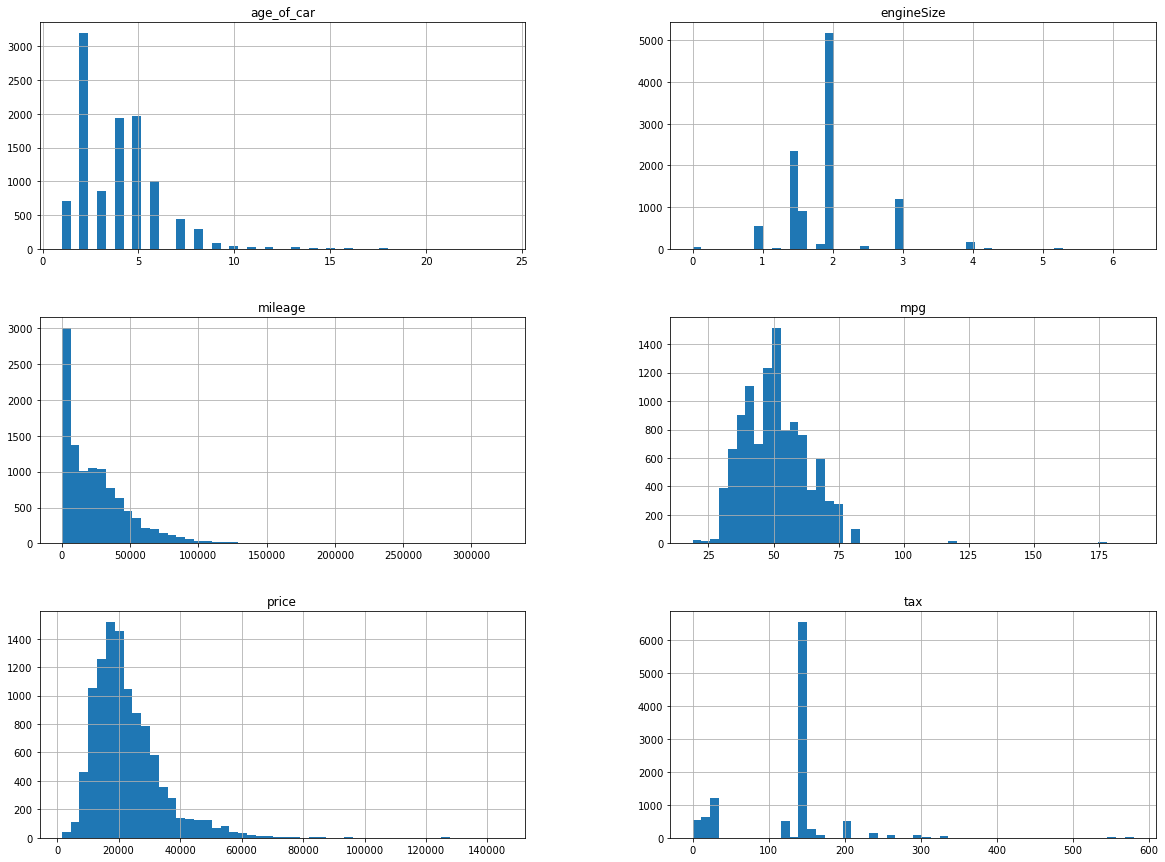

In [17]:
cars_df.hist(bins=50, figsize=(20,15))

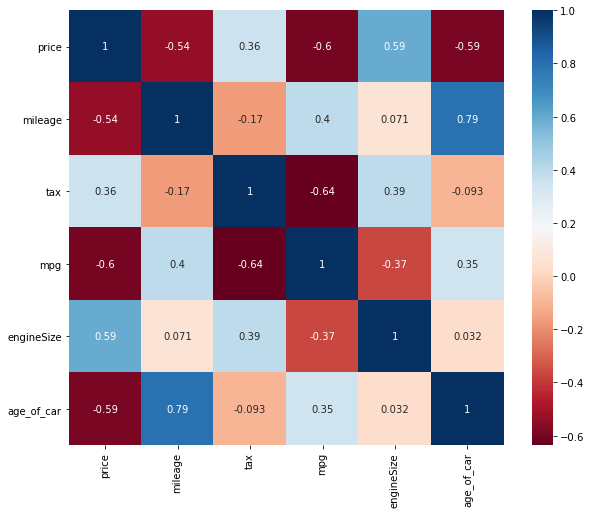

In [18]:
colormap = plt.cm.RdBu
sns.heatmap(cars_df.corr(), annot=True, cmap=colormap,square=True )
fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

# Preparing the data for the models

## Dealing with categorical data

In [19]:
cars_df_with_dummies = pd.get_dummies(cars_df)
cars_df_with_dummies

,price,mileage,tax,mpg,engineSize,age_of_car,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,12500,15735,150,55.4,1.4,4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,16500,36203,20,64.2,2.0,5,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,11000,29946,30,55.4,1.4,5,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,16800,25952,145,67.3,2.0,4,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,17300,1998,145,49.6,1.0,2,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,16999,4018,145,49.6,1.0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10664,16999,1978,150,49.6,1.0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10665,17199,609,150,49.6,1.0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10666,19499,8646,150,47.9,1.4,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


## Now I will apply the scaler on the data 

In [20]:
minmax_scaler = MinMaxScaler()

cars_scaled = minmax_scaler.fit_transform(cars_df_with_dummies)
cars_scaled = pd.DataFrame(cars_scaled, columns = cars_df_with_dummies.columns)


scaled_price_label = cars_scaled['price']
scaled_cars_without_price = cars_scaled.drop(['price'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(scaled_cars_without_price,scaled_price_label,test_size=0.2,random_state=0)

print(X_train.shape)

(8534, 37)


### This graph was taken from other notebook that I have seen and it basically plots the precision of the model with respect to the number of features

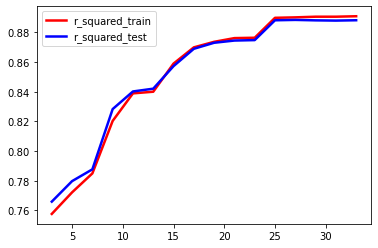

In [21]:
column_names = cars_df_with_dummies.drop(columns = ['price']).columns

no_of_features = []
r_squared_train = []
r_squared_test = []


for k in range(3, 35, 2): # From 3 to 35 variables (every single one)
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train_transformed, y_train))
    r_squared_test.append(regressor.score(X_test_transformed, y_test))
    

sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full', color='red', linewidth=2.5, label="r_squared_train")
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full', color='blue', linewidth=2.5, label="r_squared_test")
plt.show()

In [22]:
selector = SelectKBest(f_regression, k = 27)
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
column_names[selector.get_support()]

Index(['mileage', 'tax', 'mpg', 'engineSize', 'age_of_car', 'model_ A1',
       'model_ A2', 'model_ A3', 'model_ A4', 'model_ A7', 'model_ A8',
       'model_ Q5', 'model_ Q7', 'model_ Q8', 'model_ R8', 'model_ RS3',
       'model_ RS4', 'model_ RS5', 'model_ RS6', 'model_ SQ5', 'model_ SQ7',
       'model_ TT', 'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Petrol'],
      dtype='object')

In [23]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_transformed, y_train)
initial_prediction = linear_reg.predict(X_test_transformed)


print(linear_reg.score(X_test_transformed,y_test))


0.88846839958083


In [27]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_transformed, y_train)

print(forest_reg.score(X_test_transformed,y_test))


0.9520876708449336
